In [9]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
data={'text':["This is a positive % example. I am a happy person.", "Negative feedback is not appreciated.", "The product is@ excellent!", "Not satisfied with the service", "She is running so fast to win the game", "Amazing experience£ with the team!", "Poor quality ~# product."],
     'label': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive']}

In [13]:
df=pd.DataFrame(data)
df

,text,label
0,This is a positive % example. I am a happy per...,positive
1,Negative feedback is not appreciated.,negative
2,The product is@ excellent!,positive
3,Not satisfied with the service,negative
4,She is running so fast to win the game,positive
5,Amazing experience£ with the team!,negative
6,Poor quality ~# product.,positive


In [15]:
import re

def keep_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s.,!?]','',text)

In [17]:
df['clean_text']=df['text'].apply(keep_special_characters)

In [19]:
df

,text,label,clean_text
0,This is a positive % example. I am a happy per...,positive,This is a positive example. I am a happy person.
1,Negative feedback is not appreciated.,negative,Negative feedback is not appreciated.
2,The product is@ excellent!,positive,The product is excellent!
3,Not satisfied with the service,negative,Not satisfied with the service
4,She is running so fast to win the game,positive,She is running so fast to win the game
5,Amazing experience£ with the team!,negative,Amazing experience with the team!
6,Poor quality ~# product.,positive,Poor quality product.


In [21]:
df['clean_text']=df['clean_text'].str.lower()
df

,text,label,clean_text
0,This is a positive % example. I am a happy per...,positive,this is a positive example. i am a happy person.
1,Negative feedback is not appreciated.,negative,negative feedback is not appreciated.
2,The product is@ excellent!,positive,the product is excellent!
3,Not satisfied with the service,negative,not satisfied with the service
4,She is running so fast to win the game,positive,she is running so fast to win the game
5,Amazing experience£ with the team!,negative,amazing experience with the team!
6,Poor quality ~# product.,positive,poor quality product.


In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer=PorterStemmer()

In [25]:
words=["eating", "eats", "eat", "is", "ate", "adjustable", "rafting", "are", "cooking", "meeting", "better"]
for word in words:
    print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
is | is
ate | ate
adjustable | adjust
rafting | raft
are | are
cooking | cook
meeting | meet
better | better


In [27]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

def stemming(text):
    ps = PorterStemmer()
    words= nltk.word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
df['stemmed_text'] = df['clean_text'].apply(stemming)

In [33]:
df

,text,label,clean_text,stemmed_text
0,This is a positive % example. I am a happy per...,positive,this is a positive example. i am a happy person.,thi is a posit exampl . i am a happi person .
1,Negative feedback is not appreciated.,negative,negative feedback is not appreciated.,neg feedback is not appreci .
2,The product is@ excellent!,positive,the product is excellent!,the product is excel !
3,Not satisfied with the service,negative,not satisfied with the service,not satisfi with the servic
4,She is running so fast to win the game,positive,she is running so fast to win the game,she is run so fast to win the game
5,Amazing experience£ with the team!,negative,amazing experience with the team!,amaz experi with the team !
6,Poor quality ~# product.,positive,poor quality product.,poor qualiti product .


In [35]:
import spacy

spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [37]:
nlp=spacy.load("en_core_web_sm")

doc=nlp("eating eats eat is ate adjustable are rafting ability positive meeting better")
for token in doc:
    print(token, " | ", token.lemma_)

eating  |  eat
eats  |  eat
eat  |  eat
is  |  be
ate  |  eat
adjustable  |  adjustable
are  |  be
rafting  |  raft
ability  |  ability
positive  |  positive
meeting  |  meeting
better  |  well


In [41]:
def lemmatization_spacy(text):
    doc=nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

df['lemmatized_text_Spicy'] = df['clean_text'].apply(lemmatization_spacy)
df

,text,label,clean_text,stemmed_text,lemmatized_text_Spicy
0,This is a positive % example. I am a happy per...,positive,this is a positive example. i am a happy person.,thi is a posit exampl . i am a happi person .,this be a positive example . I be a happy pe...
1,Negative feedback is not appreciated.,negative,negative feedback is not appreciated.,neg feedback is not appreci .,negative feedback be not appreciate .
2,The product is@ excellent!,positive,the product is excellent!,the product is excel !,the product be excellent !
3,Not satisfied with the service,negative,not satisfied with the service,not satisfi with the servic,not satisfied with the service
4,She is running so fast to win the game,positive,she is running so fast to win the game,she is run so fast to win the game,she be run so fast to win the game
5,Amazing experience£ with the team!,negative,amazing experience with the team!,amaz experi with the team !,amazing experience with the team !
6,Poor quality ~# product.,positive,poor quality product.,poor qualiti product .,poor quality product .


In [45]:
import nltk
nltk.download('wordnet')

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_text']=df['clean_text'].apply(lemmatization)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


,text,label,clean_text,stemmed_text,lemmatized_text_Spicy,lemmatized_text
0,This is a positive % example. I am a happy per...,positive,this is a positive example. i am a happy person.,thi is a posit exampl . i am a happi person .,this be a positive example . I be a happy pe...,this is a positive example . i am a happy pers...
1,Negative feedback is not appreciated.,negative,negative feedback is not appreciated.,neg feedback is not appreci .,negative feedback be not appreciate .,negative feedback is not appreciated .
2,The product is@ excellent!,positive,the product is excellent!,the product is excel !,the product be excellent !,the product is excellent !
3,Not satisfied with the service,negative,not satisfied with the service,not satisfi with the servic,not satisfied with the service,not satisfied with the service
4,She is running so fast to win the game,positive,she is running so fast to win the game,she is run so fast to win the game,she be run so fast to win the game,she is running so fast to win the game
5,Amazing experience£ with the team!,negative,amazing experience with the team!,amaz experi with the team !,amazing experience with the team !,amazing experience with the team !
6,Poor quality ~# product.,positive,poor quality product.,poor qualiti product .,poor quality product .,poor quality product .


In [47]:
def tokenize_text(clean_text):
    return word_tokenize(clean_text)

In [49]:
def segment_sentences(clean_text):
    return sent_tokenize(clean_text)

In [51]:
df['tokens'] = df['clean_text'].apply(tokenize_text)
df['sentences'] = df['clean_text'].apply(segment_sentences)
df

,text,label,clean_text,stemmed_text,lemmatized_text_Spicy,lemmatized_text,tokens,sentences
0,This is a positive % example. I am a happy per...,positive,this is a positive example. i am a happy person.,thi is a posit exampl . i am a happi person .,this be a positive example . I be a happy pe...,this is a positive example . i am a happy pers...,"[this, is, a, positive, example, ., i, am, a, ...","[this is a positive example., i am a happy pe..."
1,Negative feedback is not appreciated.,negative,negative feedback is not appreciated.,neg feedback is not appreci .,negative feedback be not appreciate .,negative feedback is not appreciated .,"[negative, feedback, is, not, appreciated, .]",[negative feedback is not appreciated.]
2,The product is@ excellent!,positive,the product is excellent!,the product is excel !,the product be excellent !,the product is excellent !,"[the, product, is, excellent, !]",[the product is excellent!]
3,Not satisfied with the service,negative,not satisfied with the service,not satisfi with the servic,not satisfied with the service,not satisfied with the service,"[not, satisfied, with, the, service]",[not satisfied with the service]
4,She is running so fast to win the game,positive,she is running so fast to win the game,she is run so fast to win the game,she be run so fast to win the game,she is running so fast to win the game,"[she, is, running, so, fast, to, win, the, game]",[she is running so fast to win the game]
5,Amazing experience£ with the team!,negative,amazing experience with the team!,amaz experi with the team !,amazing experience with the team !,amazing experience with the team !,"[amazing, experience, with, the, team, !]",[amazing experience with the team!]
6,Poor quality ~# product.,positive,poor quality product.,poor qualiti product .,poor quality product .,poor quality product .,"[poor, quality, product, .]",[poor quality product.]


In [58]:
!pip3 install wordcloud



   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 751.6 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.9 MB/s eta 0:00:00


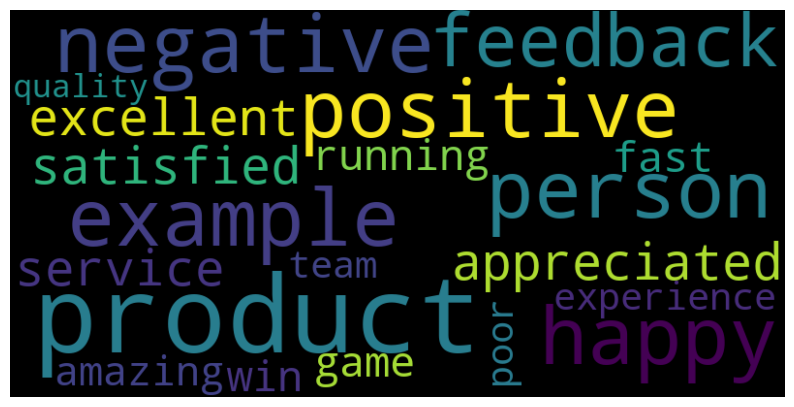

In [62]:
from wordcloud import WordCloud

all_text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['lemmatized_text'])
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [82]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [86]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)

In [88]:
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Confusion Matrix:\n{dt_confusion_matrix}")

Decision Tree Accuracy: 0.5
Decision Tree Confusion Matrix:
[[0 1]
 [0 1]]
